# Test

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [65]:
data = pd.read_csv("TSLA.csv")

In [66]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [67]:
data['Date'] = pd.to_datetime(data['Date'])

In [68]:
data.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
5,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500
6,2010-07-08,1.076000,1.168000,1.038000,1.164000,1.164000,115671000
7,2010-07-09,1.172000,1.193333,1.103333,1.160000,1.160000,60759000
8,2010-07-12,1.196667,1.204667,1.133333,1.136667,1.136667,33037500
9,2010-07-13,1.159333,1.242667,1.126667,1.209333,1.209333,40201500


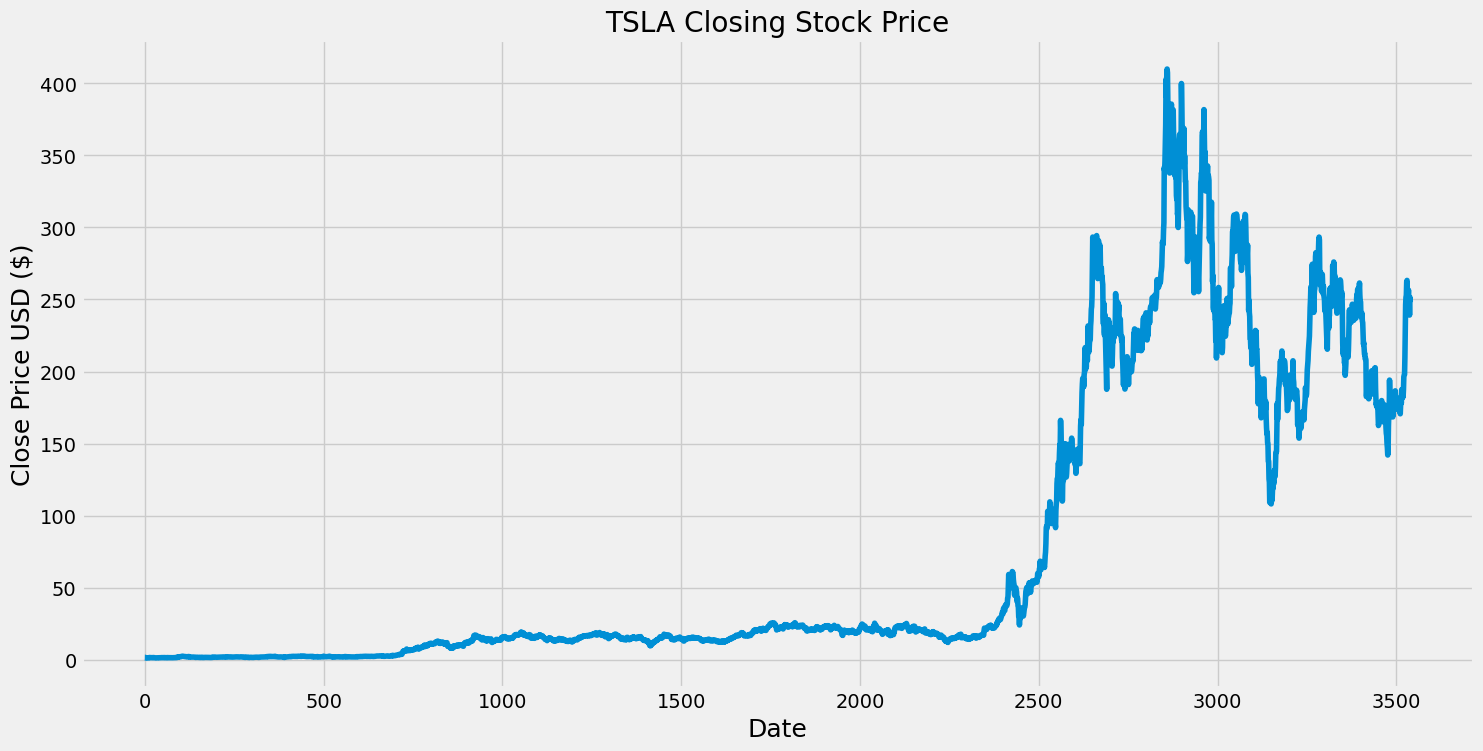

In [69]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("TSLA Closing Stock Price")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [72]:
adj_data = data[2600:]

In [73]:
adj_data.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume
2600,2020-10-26,137.210007,141.919998,136.666672,140.093338,140.093338,84717600
2601,2020-10-27,141.253326,143.500000,140.033340,141.559998,141.559998,68059500
2602,2020-10-28,138.826660,139.533340,135.333328,135.339996,135.339996,76354200
2603,2020-10-29,136.653336,139.353333,135.486664,136.943329,136.943329,67965900
2604,2020-10-30,135.633331,135.863327,126.370003,129.346664,129.346664,127533900
2605,2020-11-02,131.333328,135.660004,130.766663,133.503326,133.503326,87063300
2606,2020-11-03,136.576660,142.589996,135.563339,141.300003,141.300003,103055100
2607,2020-11-04,143.539993,145.133331,139.033340,140.326660,140.326660,96429300
2608,2020-11-05,142.766663,146.666672,141.333328,146.029999,146.029999,85243500
2609,2020-11-06,145.366669,145.523331,141.426666,143.316666,143.316666,65118000


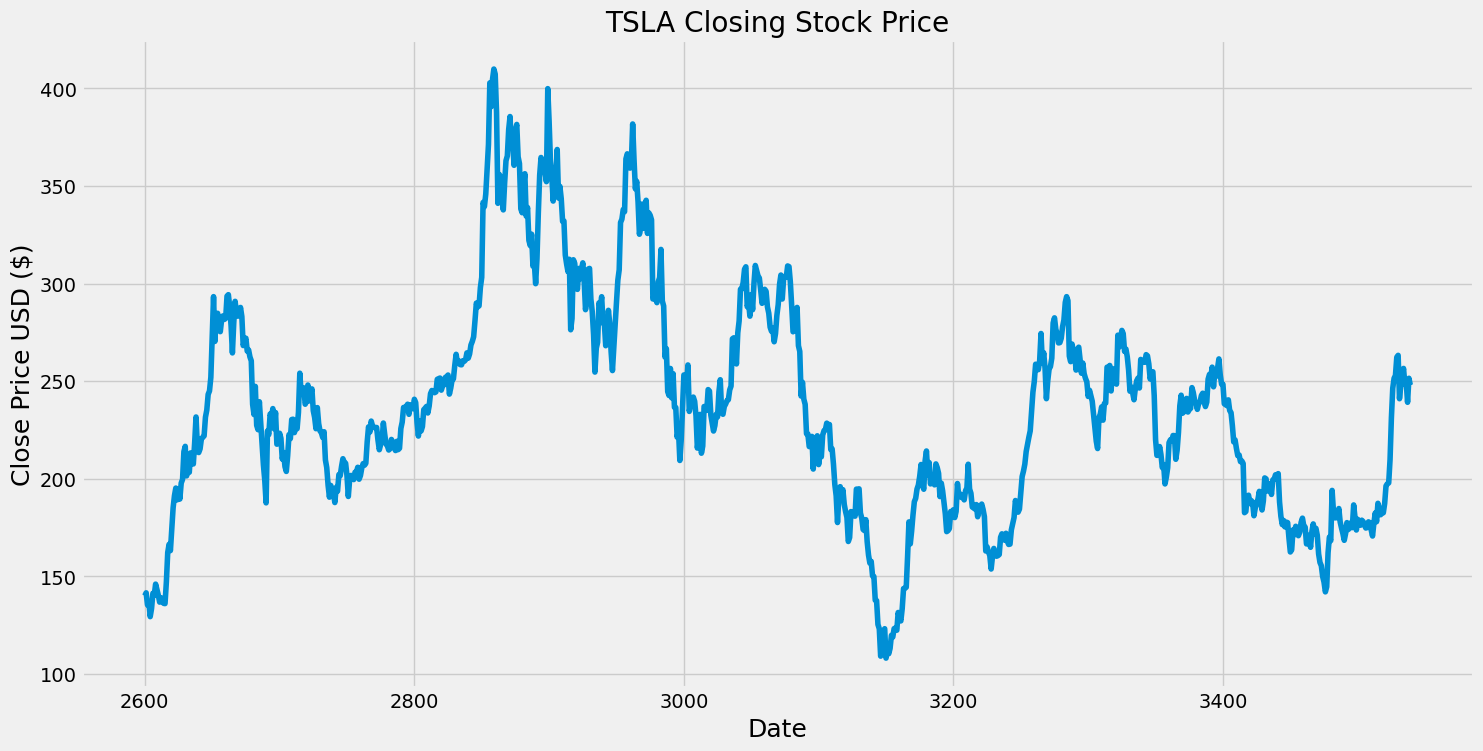

In [74]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("TSLA Closing Stock Price")
plt.plot(adj_data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [75]:
adj_data = adj_data[["Date","Close"]] 
adj_data = adj_data.rename(columns = {"Date":"ds","Close":"y"})
adj_data.head()

,ds,y
2600,2020-10-26,140.093338
2601,2020-10-27,141.559998
2602,2020-10-28,135.339996
2603,2020-10-29,136.943329
2604,2020-10-30,129.346664


In [77]:
data_split_index = int(len(adj_data) * .80)

In [78]:
train_data = adj_data[:data_split_index]
test_data = adj_data[data_split_index:]

print(f"Train Data Count: {len(train_data)}")
print(f"Test Data Count: {len(test_data)}")
print(f"Total: {len(train_data) + len(test_data)} ")

Train Data Count: 752
Test Data Count: 188
Total: 940 


In [79]:
train_data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [80]:
test_data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [83]:
train_data.tail(15)

,ds,y
3337,2023-10-02,251.600006
3338,2023-10-03,246.529999
3339,2023-10-04,261.160004
3340,2023-10-05,260.049988
3341,2023-10-06,260.529999
3342,2023-10-09,259.670013
3343,2023-10-10,263.619995
3344,2023-10-11,262.989990
3345,2023-10-12,258.869995
3346,2023-10-13,251.119995


In [85]:
test_data.tail(15)

,ds,y
3525,2024-07-02,231.259995
3526,2024-07-03,246.389999
3527,2024-07-05,251.520004
3528,2024-07-08,252.940002
3529,2024-07-09,262.329987
3530,2024-07-10,263.260010
3531,2024-07-11,241.029999
3532,2024-07-12,248.229996
3533,2024-07-15,252.639999
3534,2024-07-16,256.559998


In [86]:
%%time
model = Prophet()
model.fit(train_data)

15:27:30 - cmdstanpy - INFO - Chain [1] start processing
15:27:30 - cmdstanpy - INFO - Chain [1] done processing


CPU times: total: 93.8 ms
Wall time: 384 ms


In [87]:
forecast = model.predict(test_data)

In [88]:
forecast.dtypes

ds                            datetime64[ns]
trend                                float64
yhat_lower                           float64
yhat_upper                           float64
trend_lower                          float64
trend_upper                          float64
additive_terms                       float64
additive_terms_lower                 float64
additive_terms_upper                 float64
weekly                               float64
weekly_lower                         float64
weekly_upper                         float64
yearly                               float64
yearly_lower                         float64
yearly_upper                         float64
multiplicative_terms                 float64
multiplicative_terms_lower           float64
multiplicative_terms_upper           float64
yhat                                 float64
dtype: object

In [89]:
forecast.head(15)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-10-23,280.378049,250.163553,330.560605,280.378049,280.378049,11.098334,11.098334,11.098334,7.420881,7.420881,7.420881,3.677454,3.677454,3.677454,0.0,0.0,0.0,291.476383
1,2023-10-24,280.850472,251.548218,335.821450,280.850472,280.850472,11.566752,11.566752,11.566752,5.987214,5.987214,5.987214,5.579538,5.579538,5.579538,0.0,0.0,0.0,292.417224
2,2023-10-25,281.322895,252.146425,335.414100,281.322895,281.322895,13.708352,13.708352,13.708352,6.406949,6.406949,6.406949,7.301403,7.301403,7.301403,0.0,0.0,0.0,295.031247
3,2023-10-26,281.795318,256.371693,336.053553,281.795318,281.795318,14.124795,14.124795,14.124795,5.307234,5.307234,5.307234,8.817561,8.817561,8.817561,0.0,0.0,0.0,295.920113
4,2023-10-27,282.267742,255.677572,336.168518,282.267742,282.267742,14.724201,14.724201,14.724201,4.615484,4.615484,4.615484,10.108718,10.108718,10.108718,0.0,0.0,0.0,296.991943
5,2023-10-30,283.685011,264.442338,340.845596,283.684798,283.685011,19.959653,19.959653,19.959653,7.420881,7.420881,7.420881,12.538772,12.538772,12.538772,0.0,0.0,0.0,303.644664
6,2023-10-31,284.157435,264.680989,340.791096,284.138173,284.157435,18.857402,18.857402,18.857402,5.987214,5.987214,5.987214,12.870188,12.870188,12.870188,0.0,0.0,0.0,303.014837
7,2023-11-01,284.629858,264.712414,342.246690,284.556500,284.674338,19.386739,19.386739,19.386739,6.406949,6.406949,6.406949,12.979790,12.979790,12.979790,0.0,0.0,0.0,304.016596
8,2023-11-02,285.102281,261.518020,343.483872,284.929900,285.177064,18.194167,18.194167,18.194167,5.307234,5.307234,5.307234,12.886933,12.886933,12.886933,0.0,0.0,0.0,303.296448
9,2023-11-03,285.574704,262.984172,341.337977,285.311135,285.712102,17.231486,17.231486,17.231486,4.615484,4.615484,4.615484,12.616002,12.616002,12.616002,0.0,0.0,0.0,302.806190


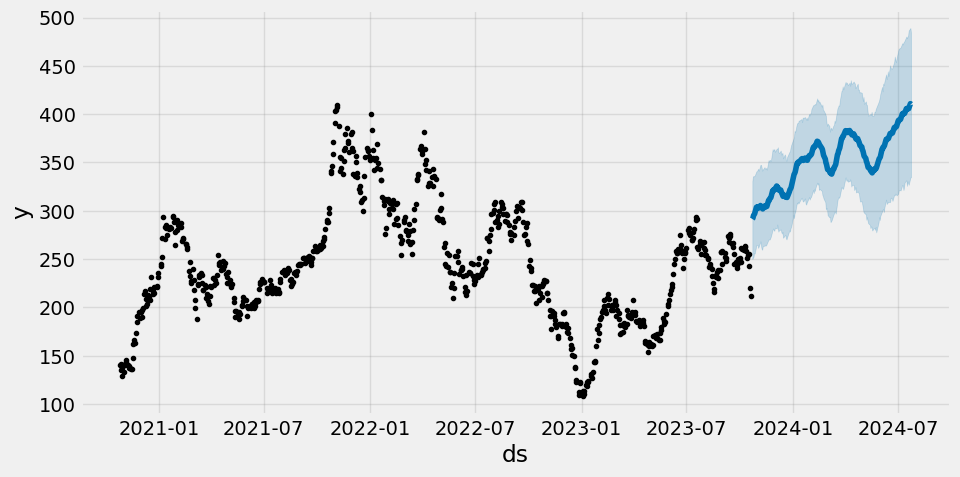

In [90]:
fig, ax = plt.subplots(figsize=(10,5))
fig = model.plot(forecast, ax=ax)
plt.show()

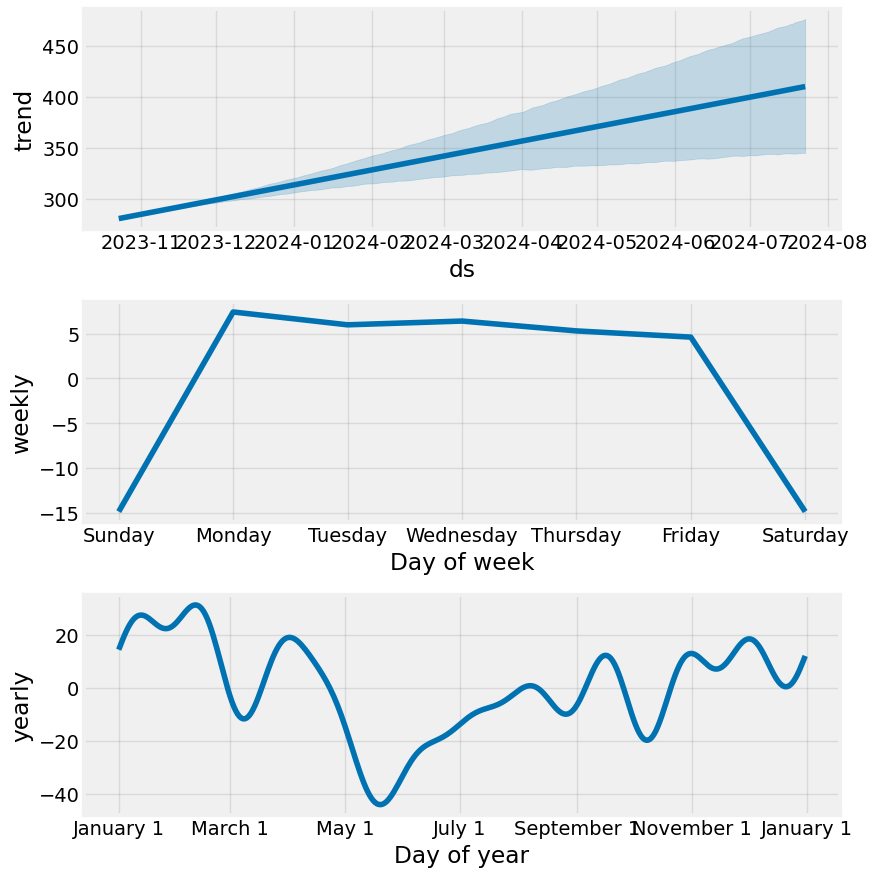

In [91]:
model.plot_components(forecast)
plt.show()

In [92]:
compare_results = test_data[['ds', 'y']].merge(forecast[['ds','yhat']], on='ds')
compare_results.rename(columns={'y' :'Actual', 'yhat':'Forecast'}, inplace=True)

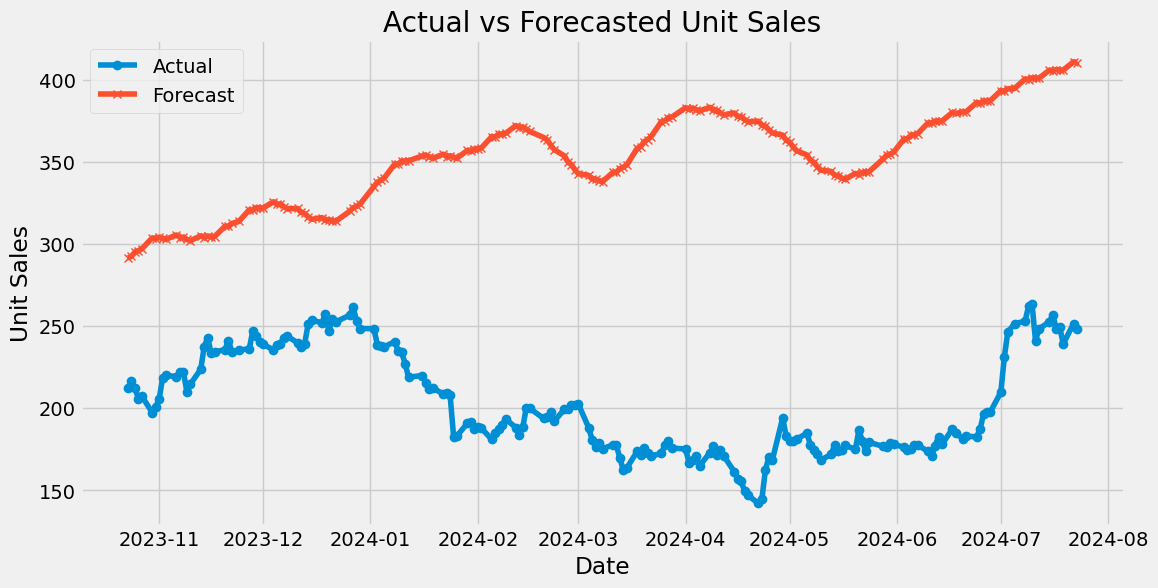

In [93]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(compare_results['ds'], compare_results['Actual'], label='Actual', marker='o')
plt.plot(compare_results['ds'], compare_results['Forecast'], label='Forecast', marker='x')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.title('Actual vs Forecasted Unit Sales')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
data = data[["Date","Close"]] 
data = data.rename(columns = {"Date":"ds","Close":"y"})
data.head()

,ds,y
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000


In [45]:
data_split_index = int(len(data) * .80)

In [47]:
train_data = data[:data_split_index]
test_data = data[data_split_index:]

print(f"Train Data Count: {len(train_data)}")
print(f"Test Data Count: {len(test_data)}")
print(f"Total: {len(train_data) + len(test_data)} ")

Train Data Count: 2832
Test Data Count: 708
Total: 3540 


In [48]:
train_data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [49]:
test_data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [50]:
train_data.tail(15)

,ds,y
2817,2021-09-07,250.973328
2818,2021-09-08,251.289993
2819,2021-09-09,251.619995
2820,2021-09-10,245.423340
2821,2021-09-13,247.666672
2822,2021-09-14,248.163330
2823,2021-09-15,251.943329
2824,2021-09-16,252.330002
2825,2021-09-17,253.163330
2826,2021-09-20,243.389999


In [51]:
test_data.tail(15)

,ds,y
3525,2024-07-02,231.259995
3526,2024-07-03,246.389999
3527,2024-07-05,251.520004
3528,2024-07-08,252.940002
3529,2024-07-09,262.329987
3530,2024-07-10,263.260010
3531,2024-07-11,241.029999
3532,2024-07-12,248.229996
3533,2024-07-15,252.639999
3534,2024-07-16,256.559998


In [52]:
%%time
model = Prophet()
model.fit(train_data)

15:19:26 - cmdstanpy - INFO - Chain [1] start processing
15:19:27 - cmdstanpy - INFO - Chain [1] done processing


CPU times: total: 281 ms
Wall time: 989 ms


In [53]:
forecast = model.predict(test_data)

In [54]:
forecast.dtypes

ds                            datetime64[ns]
trend                                float64
yhat_lower                           float64
yhat_upper                           float64
trend_lower                          float64
trend_upper                          float64
additive_terms                       float64
additive_terms_lower                 float64
additive_terms_upper                 float64
weekly                               float64
weekly_lower                         float64
weekly_upper                         float64
yearly                               float64
yearly_lower                         float64
yearly_upper                         float64
multiplicative_terms                 float64
multiplicative_terms_lower           float64
multiplicative_terms_upper           float64
yhat                                 float64
dtype: object

In [55]:
forecast.head(15)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-09-28,264.810926,243.795865,283.258147,264.810926,264.810926,-1.100182,-1.100182,-1.100182,-0.109307,-0.109307,-0.109307,-0.990874,-0.990874,-0.990874,0.0,0.0,0.0,263.710744
1,2021-09-29,265.144019,244.462377,282.165558,265.144019,265.144019,-1.059480,-1.059480,-1.059480,-0.051269,-0.051269,-0.051269,-1.008210,-1.008210,-1.008210,0.0,0.0,0.0,264.084539
2,2021-09-30,265.477112,242.983172,283.351589,265.477112,265.477112,-1.252445,-1.252445,-1.252445,-0.229668,-0.229668,-0.229668,-1.022777,-1.022777,-1.022777,0.0,0.0,0.0,264.224667
3,2021-10-01,265.810205,245.661392,283.979182,265.810205,265.810205,-1.382313,-1.382313,-1.382313,-0.347514,-0.347514,-0.347514,-1.034799,-1.034799,-1.034799,0.0,0.0,0.0,264.427892
4,2021-10-04,266.809485,247.751829,284.469515,266.809485,266.809485,-1.137888,-1.137888,-1.137888,-0.078720,-0.078720,-0.078720,-1.059168,-1.059168,-1.059168,0.0,0.0,0.0,265.671597
5,2021-10-05,267.142578,247.006450,284.579146,267.142578,267.142578,-1.174339,-1.174339,-1.174339,-0.109307,-0.109307,-0.109307,-1.065032,-1.065032,-1.065032,0.0,0.0,0.0,265.968240
6,2021-10-06,267.475671,247.051959,287.486274,267.475671,267.475671,-1.122071,-1.122071,-1.122071,-0.051269,-0.051269,-0.051269,-1.070802,-1.070802,-1.070802,0.0,0.0,0.0,266.353600
7,2021-10-07,267.808765,246.413101,284.951239,267.808765,267.808765,-1.306883,-1.306883,-1.306883,-0.229668,-0.229668,-0.229668,-1.077215,-1.077215,-1.077215,0.0,0.0,0.0,266.501882
8,2021-10-08,268.141858,247.424062,286.107442,268.141858,268.141858,-1.432584,-1.432584,-1.432584,-0.347514,-0.347514,-0.347514,-1.085070,-1.085070,-1.085070,0.0,0.0,0.0,266.709274
9,2021-10-11,269.141137,247.335249,286.826630,269.141137,269.141137,-1.204569,-1.204569,-1.204569,-0.078720,-0.078720,-0.078720,-1.125848,-1.125848,-1.125848,0.0,0.0,0.0,267.936569


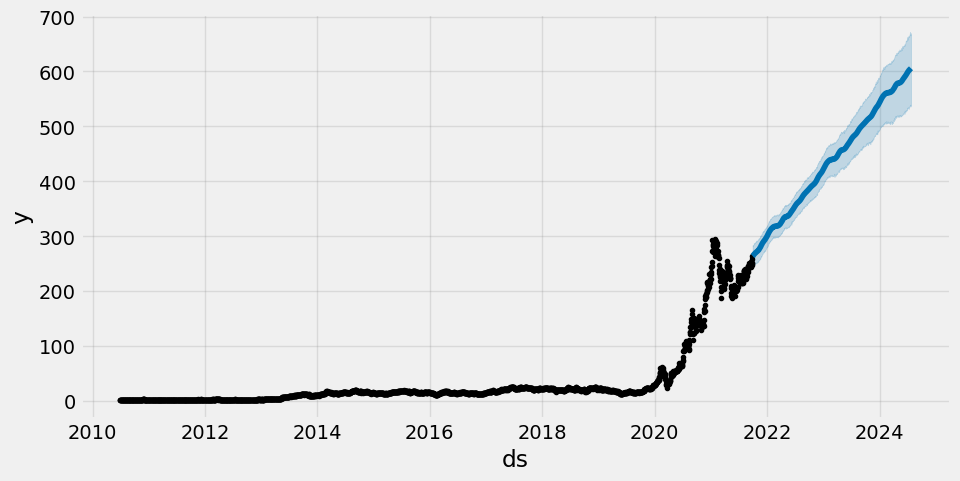

In [56]:
fig, ax = plt.subplots(figsize=(10,5))
fig = model.plot(forecast, ax=ax)
plt.show()

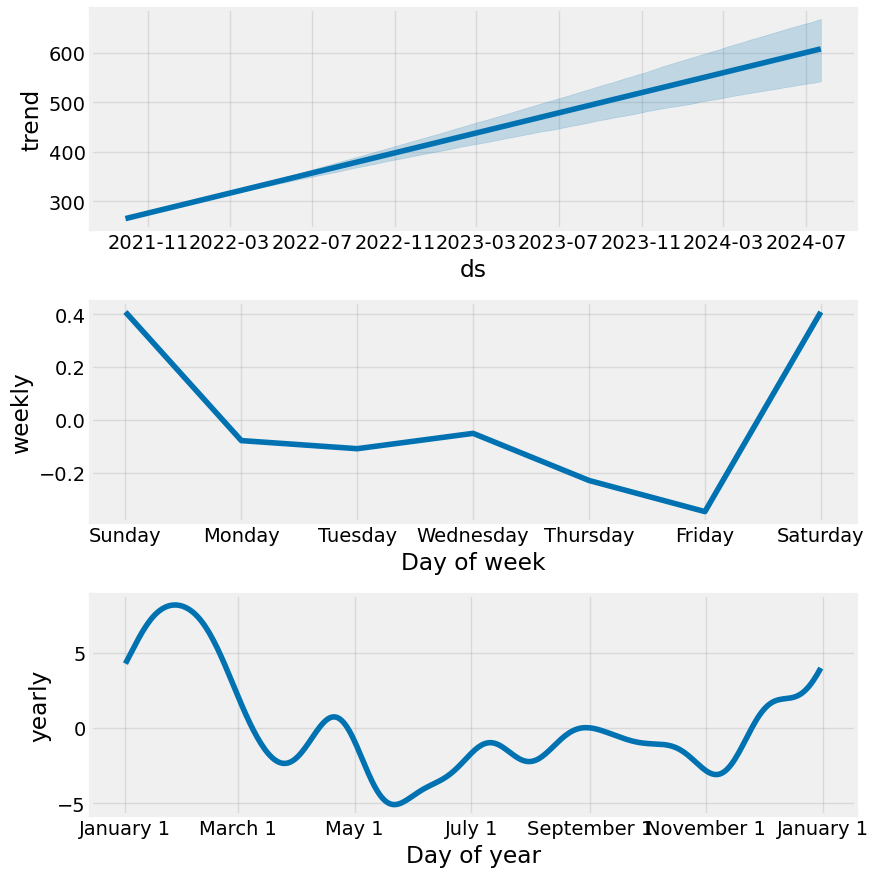

In [57]:
model.plot_components(forecast)
plt.show()

In [58]:
compare_results = test_data[['ds', 'y']].merge(forecast[['ds','yhat']], on='ds')
compare_results.rename(columns={'y' :'Actual', 'yhat':'Forecast'}, inplace=True)

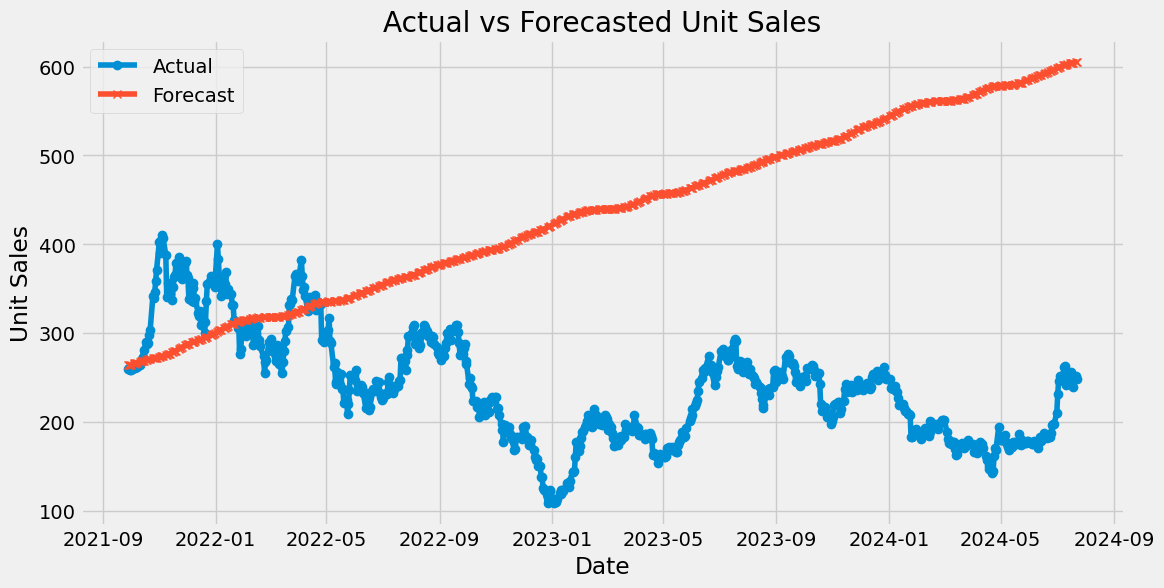

In [60]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(compare_results['ds'], compare_results['Actual'], label='Actual', marker='o')
plt.plot(compare_results['ds'], compare_results['Forecast'], label='Forecast', marker='x')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.title('Actual vs Forecasted Unit Sales')
plt.legend()
plt.grid(True)
plt.show()


# Test

In [60]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [84]:
def get_data(path):
    data = pd.read_csv(path)
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    return data

In [85]:
tsla = get_data('TSLA.csv')

In [87]:
def plot_historical_data(data, stock_name):
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel('Date')
    plt.ylabel('Close Prices')
    plt.plot(data['Close'])
    plt.title(f'{stock_name} closing price')
    plt.show()

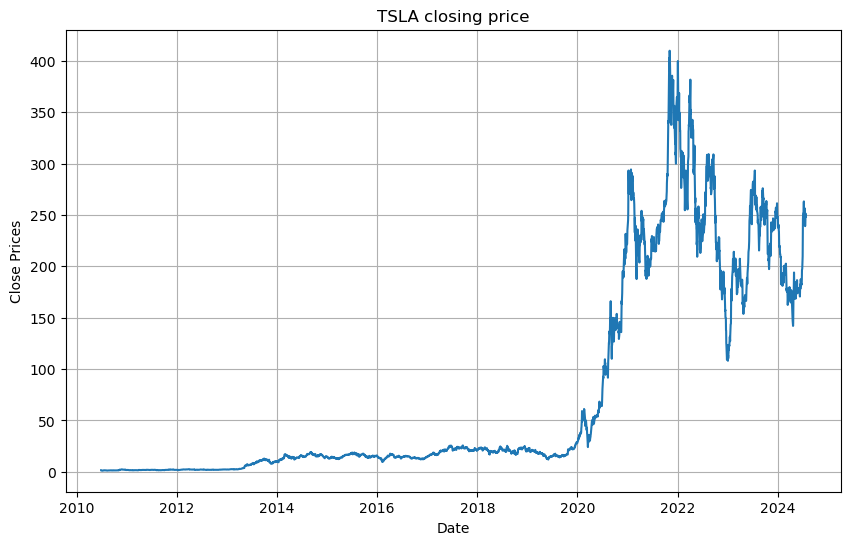

In [88]:
plot_historical_data(tsla, 'TSLA')

In [92]:
def plot_kde(data):
    df_close = data['Close']
    df_close.plot(kind='kde')
    return df_close

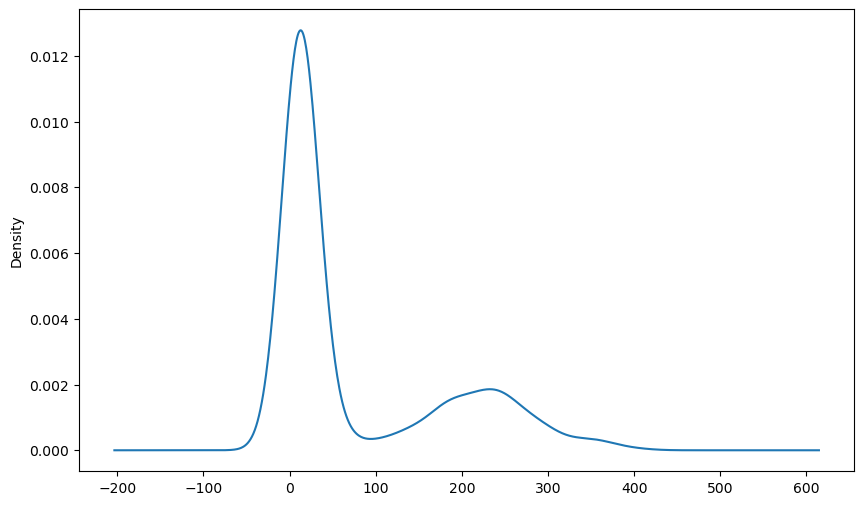

In [94]:
df_close = plot_kde(tsla)

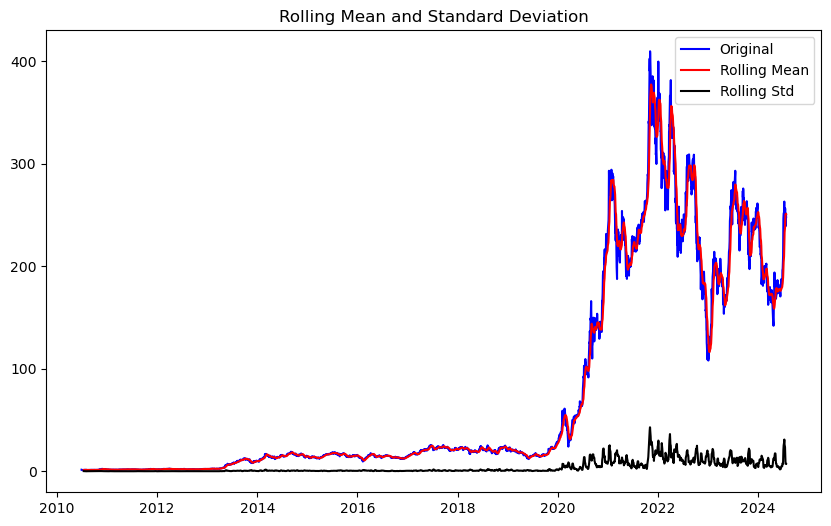

Results of dickey fuller test
Test Statistics                  -1.054550
p-value                           0.732853
No. of lags used                 29.000000
Number of observations used    3510.000000
critical value (1%)              -3.432214
critical value (5%)              -2.862364
critical value (10%)             -2.567209
dtype: float64


In [95]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

In [65]:
data_tsla = pd.read_csv("TSLA.csv")
data_tsla['Date'] = pd.to_datetime(data_tsla['Date'])
data_tsla.set_index('Date', inplace=True)

In [66]:
data_tsla.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

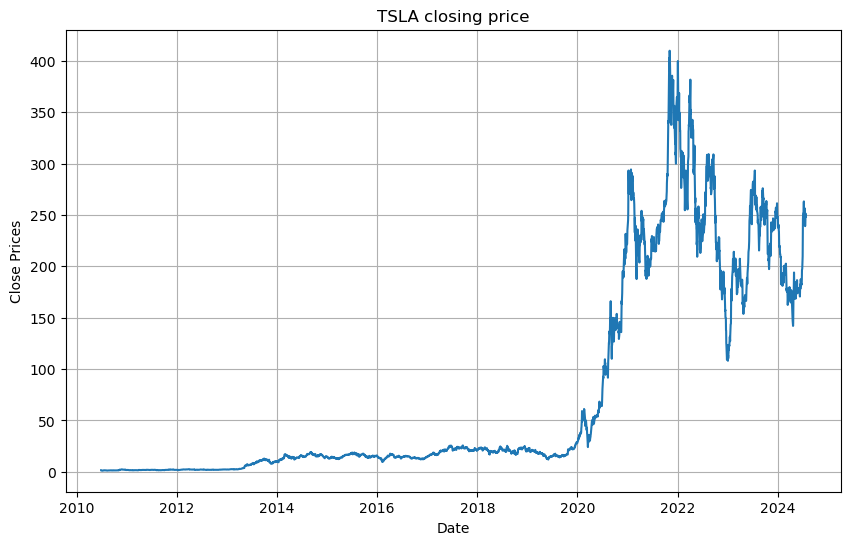

In [67]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(data_tsla['Close'])
plt.title('TSLA closing price')
plt.show()

<Axes: ylabel='Density'>

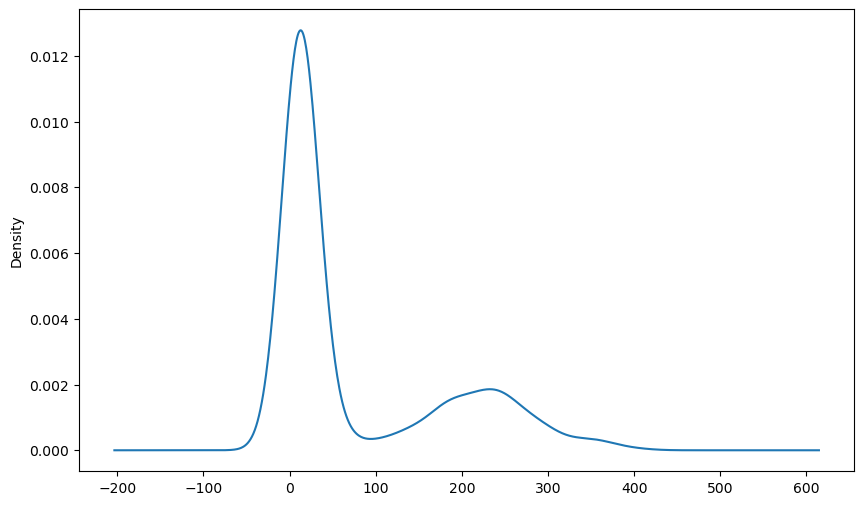

In [68]:
df_close = data_tsla['Close']
df_close.plot(kind='kde')

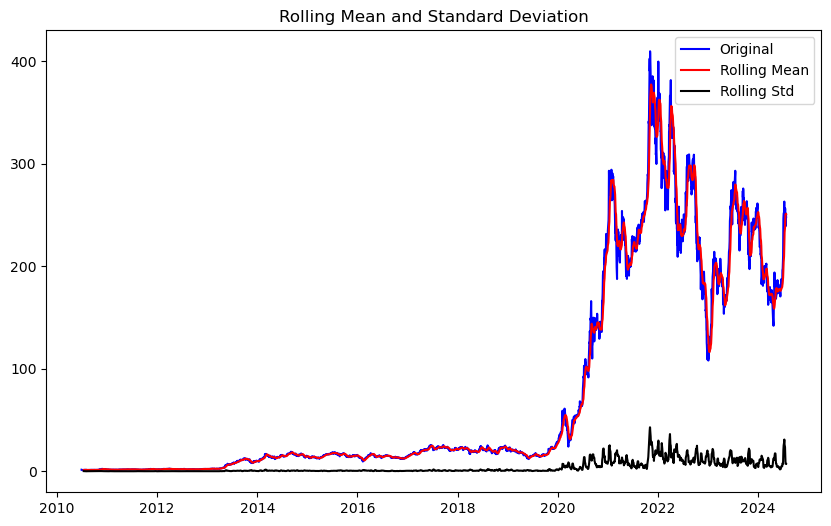

Results of dickey fuller test
Test Statistics                  -1.054550
p-value                           0.732853
No. of lags used                 29.000000
Number of observations used    3510.000000
critical value (1%)              -3.432214
critical value (5%)              -2.862364
critical value (10%)             -2.567209
dtype: float64


In [69]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

<Figure size 1000x600 with 0 Axes>

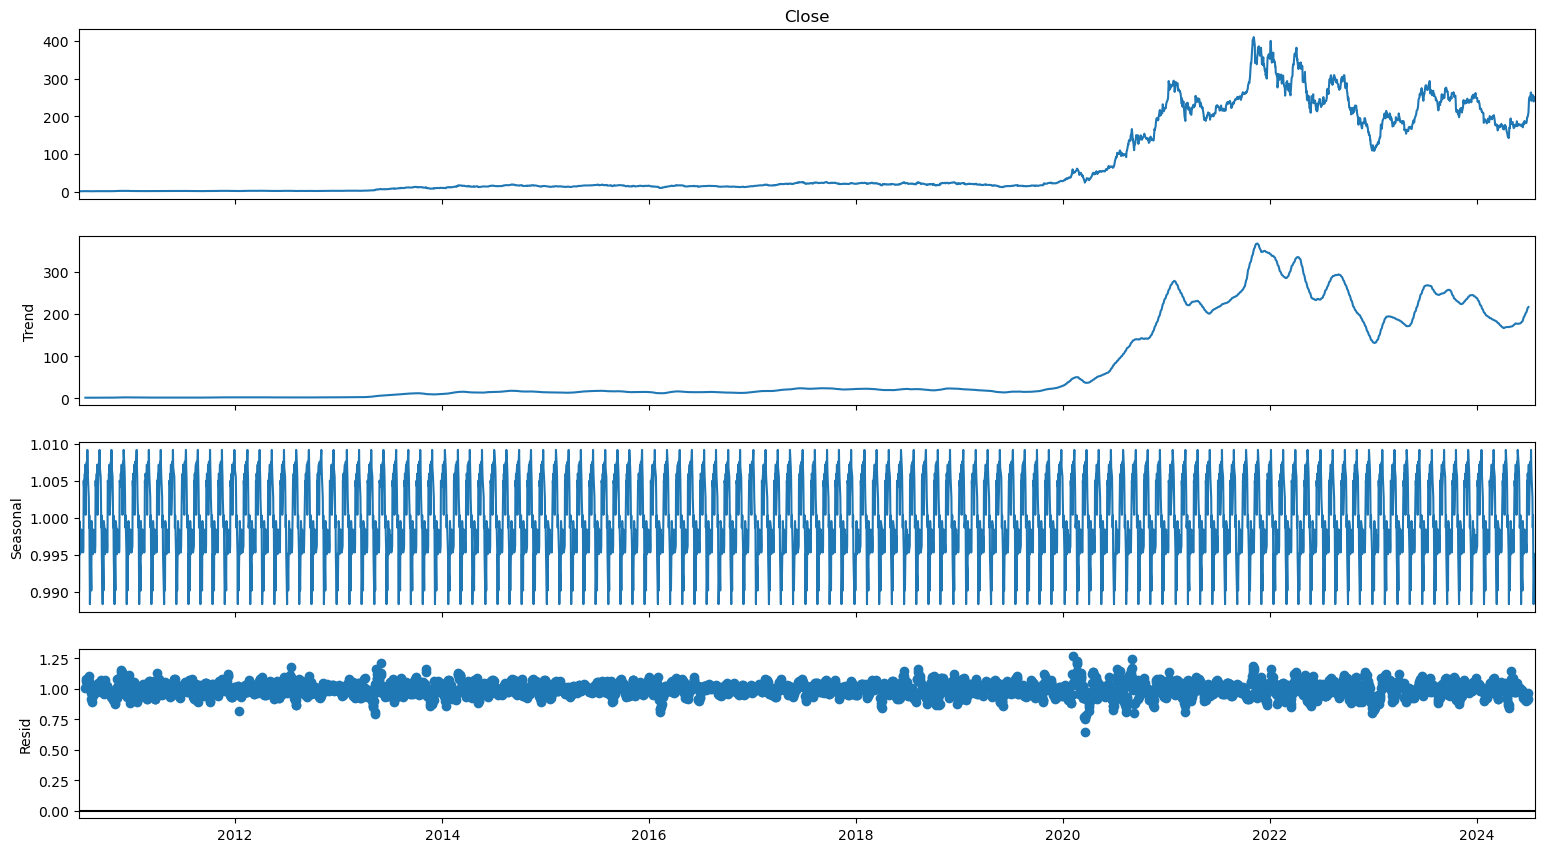

In [70]:
result = seasonal_decompose(df_close, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


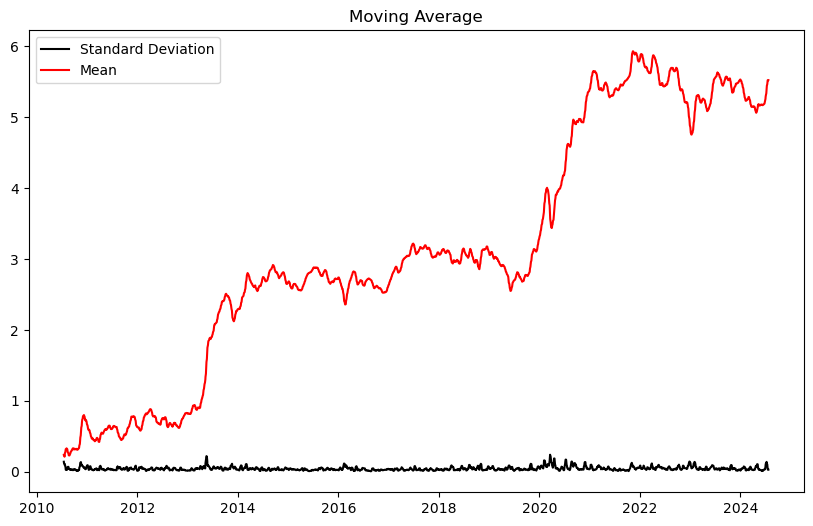

In [71]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

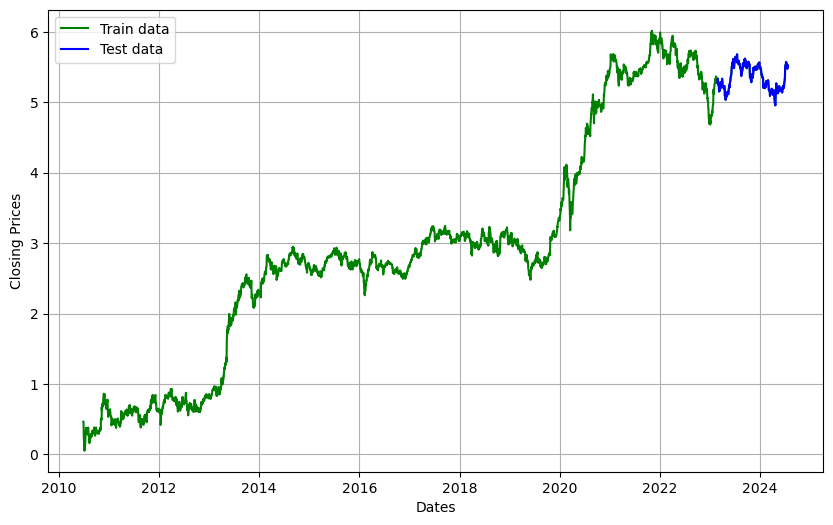

In [72]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-12131.192, Time=0.44 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-12129.651, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-12129.649, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-12126.966, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-12127.647, Time=0.33 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.482 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3183
Model:               SARIMAX(0, 1, 0)   Log Likelihood                6067.596
Date:                Mon, 29 Jul 2024   AIC                         -12131.192
Time:                        14:05:38   BIC                         -12119.061
Sample:                             0   HQIC                        -12126.842
                               - 3183                             

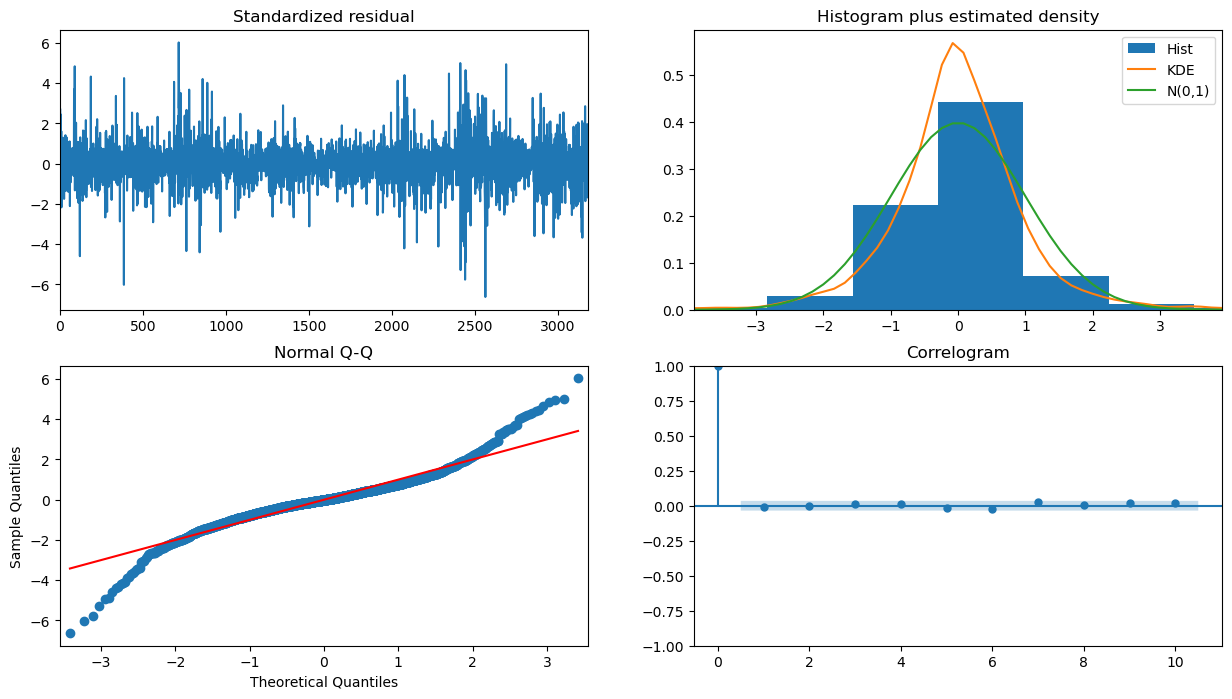

In [73]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [75]:
#Modeling
# Build Model
model = ARIMA(train_data, order=(0,1,0))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3183
Model:                 ARIMA(0, 1, 0)   Log Likelihood                6064.483
Date:                Mon, 29 Jul 2024   AIC                         -12126.966
Time:                        14:11:03   BIC                         -12120.900
Sample:                             0   HQIC                        -12124.790
                               - 3183                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0013   1.74e-05     74.527      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):              3319.75
Prob(Q):                              0.50   Pr

In [77]:
# Generate forecasts
forecast_results = fitted.get_forecast(steps=len(test_data))

In [78]:
# Access forecasted mean values and confidence intervals
forecast_mean = forecast_results.predicted_mean
confidence_intervals = forecast_results.conf_int(alpha=0.05)

In [79]:
# Ensure index alignment
forecast_series = pd.Series(forecast_mean.values, index=test_data.index)
lower_series = pd.Series(confidence_intervals.iloc[:, 0].values, index=test_data.index)
upper_series = pd.Series(confidence_intervals.iloc[:, 1].values, index=test_data.index)

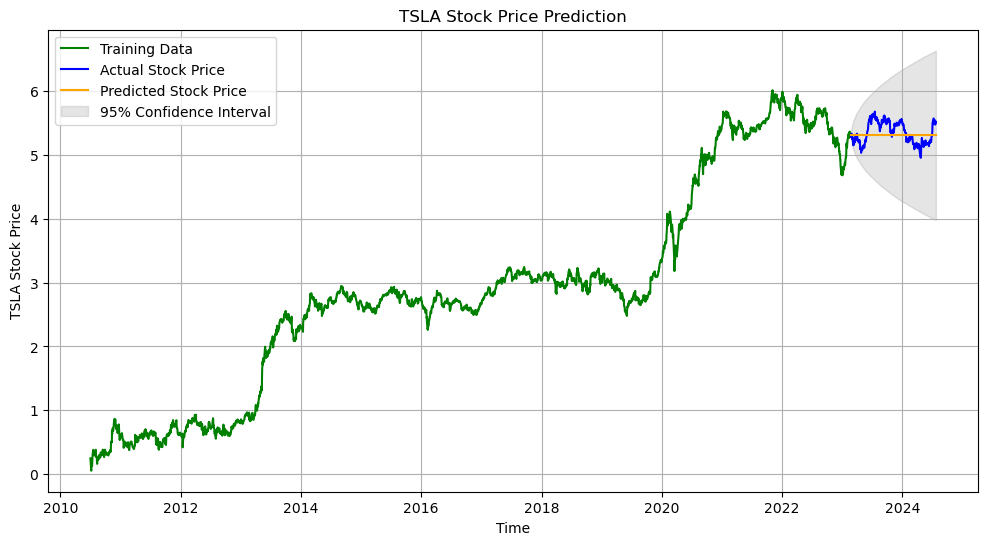

In [80]:
# Plot results
plt.figure(figsize=(12,6), dpi=100)
plt.plot(train_data, label='Training Data', color='green')
plt.plot(test_data, color='blue', label='Actual Stock Price')
plt.plot(forecast_series, color='orange', label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=0.1, label='95% Confidence Interval')
plt.title('TSLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TSLA Stock Price')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()

In [82]:
# report performance
mse = mean_squared_error(test_data, forecast_series)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, forecast_series)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, forecast_series))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(forecast_series - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.03099625920618875
MAE: 0.15506587957838022
RMSE: 0.17605754515552222
MAPE: 0.028822366455928155
